<a href="https://colab.research.google.com/github/anshudhanshu/Demand-Prediction-for-public-transport/blob/main/Sudhanshu_Rawat_Team_5_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Traffic Jam: Predicting People's Movement into Nairobi </u></b>

## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>Nairobi Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


### Uber Movement traffic data can be accessed [here](https://movement.uber.com). Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

In [152]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [154]:
import datetime

In [155]:
dataset = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 1/Copy of Nairobi Transport Data.zip (Unzipped Files)/train_revised.csv')
dataset.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [156]:
dataset.tail()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49
51644,14304,7,Mpesa,AQN7FBUSGP,14-11-17,5:10,Kisii,Nairobi,Bus,49


In [157]:
dataset['travel_date'].unique()

array(['17-10-17', '19-11-17', '26-11-17', '27-11-17', '20-04-18',
       '19-04-18', '18-04-18', '17-04-18', '16-04-18', '15-04-18',
       '14-04-18', '13-04-18', '12-04-18', '11-04-18', '28-11-17',
       '10-04-18', '09-04-18', '08-04-18', '07-04-18', '06-04-18',
       '05-04-18', '04-04-18', '03-04-18', '02-04-18', '01-04-18',
       '31-03-18', '30-03-18', '29-03-18', '28-03-18', '27-03-18',
       '29-11-17', '26-03-18', '25-03-18', '24-03-18', '23-03-18',
       '22-03-18', '21-03-18', '20-03-18', '19-03-18', '18-03-18',
       '17-03-18', '16-03-18', '30-11-17', '01-12-17', '15-03-18',
       '02-12-17', '14-03-18', '13-03-18', '03-12-17', '04-12-17',
       '12-03-18', '05-12-17', '11-03-18', '06-12-17', '10-03-18',
       '09-03-18', '07-12-17', '08-03-18', '08-12-17', '07-03-18',
       '06-03-18', '09-12-17', '10-12-17', '05-03-18', '04-03-18',
       '11-12-17', '12-12-17', '03-03-18', '02-03-18', '13-12-17',
       '01-03-18', '14-12-17', '28-02-18', '27-02-18', '15-12-

### **Understanding The data**

In [158]:
dataset.shape

(51645, 10)

There are 51645 observations in the dataset. And has 10 columns.

In [159]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [160]:
dataset.describe(include='all')

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
count,51645.000000,51645,51645,51645,51645,51645,51645,51645,51645,51645.000000
unique,NaN,61,2,51645,149,78,17,1,2,NaN
top,NaN,1,Mpesa,NUQDDVZU5Z,10-12-17,7:09,Kisii,Nairobi,Bus,NaN
freq,NaN,2065,51532,1,856,3926,22607,51645,31985,NaN
mean,10188.645793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.534321
std,2211.295708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.451193
min,1442.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
25%,8287.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
50%,10353.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.000000
75%,12029.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.000000


In [161]:
dataset.isnull().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

In [162]:
dataset.seat_number.unique()

array(['15A', '14A', '8B', '19A', '11A', '18B', '25', '21B', '22A', '17B',
       '1X', '3A', '1B', '1', '4A', '18A', '23A', '5', '16B', '8', '15B',
       '10', '3', '9', '7', '6', '4', '2', '20A', '9A', '22B', '23B',
       '24A', '2B', '13B', '24B', '14B', '20B', '19B', '10A', '17A', '2A',
       '7B', '6B', '5B', '3B', '4B', '1A', '5A', '6A', '21A', '13A', '8A',
       '9B', '12B', '10B', '7A', '16A', '12A', '11B', '14'], dtype=object)

In [163]:
dataset['travel_time'].unique()

array(['7:15', '7:12', '7:05', '7:10', '7:09', '5:10', '9:50', '7:06',
       '6:00', '5:50', '10:58', '6:50', '5:30', '6:40', '9:10', '5:00',
       '5:20', '10:52', '10:50', '10:51', '8:20', '19:03', '7:02', '6:30',
       '7:20', '7:04', '19:05', '19:04', '6:59', '7:08', '5:40', '9:00',
       '7:14', '7:07', '8:00', '7:30', '10:57', '8:30', '11:01', '7:11',
       '7:03', '6:58', '11:05', '10:20', '10:53', '10:00', '8:50',
       '10:54', '7:01', '7:00', '6:10', '6:20', '10:10', '11:02', '9:40',
       '9:30', '7:50', '10:56', '10:55', '10:40', '10:30', '9:20', '8:40',
       '8:10', '7:40', '7:13', '11:00', '11:04', '19:06', '10:59',
       '11:07', '11:06', '11:03', '19:07', '11:08', '11:09', '23:09',
       '23:10'], dtype=object)

In [164]:
dataset.travel_time.value_counts()

7:09     3926
7:04     3837
7:12     3540
19:07    3227
7:08     2989
         ... 
11:05      51
11:06      48
11:07      32
11:08      18
11:09       9
Name: travel_time, Length: 78, dtype: int64

In [165]:
dataset[['travel_date','seat_number']].groupby('travel_date').count().reset_index().sort_values(by='travel_date')

,travel_date,seat_number
0,01-01-18,61
1,01-02-18,456
2,01-03-18,439
3,01-04-18,274
4,01-12-17,434
...,...,...
144,30-11-17,86
145,30-12-17,172
146,31-01-18,336
147,31-03-18,170


In [166]:
traveler_per_day = pd.DataFrame(dataset[['travel_date','travel_from','travel_to']].groupby(['travel_date','travel_to','travel_from']).agg({'travel_from':'count'}))



In [167]:

traveler_per_day.rename(columns={'travel_from':'Sold_ticket'},inplace=True)

In [168]:
traveler_per_day = traveler_per_day.reset_index()

In [169]:

traveler_per_day['travel_date']

0       01-01-18
1       01-01-18
2       01-01-18
3       01-01-18
4       01-01-18
          ...   
1243    31-12-17
1244    31-12-17
1245    31-12-17
1246    31-12-17
1247    31-12-17
Name: travel_date, Length: 1248, dtype: object

In [170]:
traveler_per_day['travel_date'] = pd.to_datetime(traveler_per_day['travel_date'])

In [171]:
traveler_per_day.sort_values(by='travel_date',ascending=True)

,travel_date,travel_to,travel_from,Sold_ticket
36,2017-01-12,Nairobi,Rongo,11
34,2017-01-12,Nairobi,Kisii,315
33,2017-01-12,Nairobi,Keumbu,1
32,2017-01-12,Nairobi,Keroka,106
35,2017-01-12,Nairobi,Migori,1
...,...,...,...,...
504,2018-12-04,Nairobi,Rodi,29
506,2018-12-04,Nairobi,Sirare,38
507,2018-12-04,Nairobi,Sori,5
495,2018-12-04,Nairobi,Homa Bay,70


In [172]:
traveler_per_day[['travel_date','Sold_ticket']].groupby('travel_date').sum()

,Sold_ticket
travel_date,
2017-01-12,434
2017-02-12,71
2017-03-12,152
2017-04-12,326
2017-05-12,498
...,...
2018-11-04,391
2018-12-01,410
2018-12-02,508


In [173]:
len(dataset['ride_id'].unique())

6249

In [174]:
dataset['ride_id'].value_counts()

8454     50
8090     49
10834    49
11382    49
13211    49
         ..
5804      1
9834      1
9738      1
11755     1
6147      1
Name: ride_id, Length: 6249, dtype: int64

In [175]:
column = dataset.columns

In [176]:
column

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

### Finding Our Target Variable

In [177]:
label = Target=dataset.groupby(["ride_id"]).seat_number.count().rename("number_of_ticket").reset_index()
label

,ride_id,number_of_ticket
0,1442,1
1,5437,1
2,5710,1
3,5777,5
4,5778,31
...,...,...
6244,20113,9
6245,20114,4
6246,20115,5
6247,20116,1


#### Now we found our target variable so let us delete the duplicate values from `ride_id` 

In [178]:
dataset=dataset.drop_duplicates("ride_id")

In [179]:
dataset.shape

(6249, 10)

In [180]:
dataset = dataset.merge(label, how="left",on="ride_id")
dataset.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,31


In [181]:
dataset = dataset.drop(['seat_number','payment_method','payment_receipt'], axis=1)

In [182]:
X = dataset.drop('number_of_ticket', axis=1)
y = dataset['number_of_ticket']

### **Removing Constant Features**

We need to first remove the constant features. 

In [333]:
import warnings
warnings.filterwarnings('ignore')

In [392]:
dataset.drop(["travel_to"],axis=1,inplace=True)


In [393]:
dataset["date"]=dataset["travel_date"]+ " "+dataset["travel_time"]


In [394]:
def  time_features(df): 
    df["date"]=pd.to_datetime(df["date"])
    df["day_of_week"]=df["date"].dt.dayofweek
    df["day_of_year"]=df["date"].dt.dayofyear
    df["day_of_month"]=df["date"].dt.day
    df["year_woy"]=df["date"].dt.year.astype(str)+df["date"].dt.weekofyear.astype(str)
    df["hour"]=df["date"].dt.hour
    df["minute"]=df["date"].dt.minute
    df["is_weekend"]=df["day_of_week"].apply( lambda x : 1 if x  in [5,6] else 0 )
    df["year"]=df["date"].dt.year
    df["quarter"]=df["date"].dt.quarter
    df["month"]=df["date"].dt.month
    return df

In [395]:
dataset=time_features(dataset)

In [396]:
dataset.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month
0,1442,17-10-17,7:15,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,17,201742,7,15,0,2017,4,10
1,5437,19-11-17,7:12,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,19,201746,7,12,1,2017,4,11
2,5710,26-11-17,7:05,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,26,201747,7,5,1,2017,4,11
3,5777,27-11-17,7:10,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,27,201748,7,10,0,2017,4,11
4,5778,27-11-17,7:12,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,27,201748,7,12,0,2017,4,11


In [397]:
def data_characterization(df):
  characterized_df = pd.DataFrame(columns=['Columns name',	'Type', 'unique values Count', 'Count Nan values','Ratio Nan values','Unique values',	'Max',	'Min','Mean','std'])
  for col in df.columns:
    try:
      characterized_df = characterized_df.append({'Columns name':col,	'Type':df[col].dtype, 'unique values Count':len(df[col].unique()), 
                                                  'Count Nan values':df[col].isnull().sum(),'Ratio Nan values':df[col].isnull().sum()/df[col].shape[0],
                                                  'Unique values':df[col].unique(),	'Max':df[col].max(),	'Min':df[col].min(),'Mean':df[col].mean(),'std':df[col].std()},
                                                ignore_index=True)
    except:
      characterized_df = characterized_df.append({'Columns name':col,	'Type':df[col].dtype, 'unique values Count':len(df[col].unique()), 
                                                  'Count Nan values':df[col].isnull().sum(),'Ratio Nan values':df[col].isnull().sum()/df[col].shape[0],
                                                  'Unique values':df[col].unique(),	'Max':np.nan,	'Min':np.nan,'Mean':np.nan,'std':np.nan},
                                                ignore_index=True)
  return characterized_df

In [398]:
data_characterization(dataset)

,Columns name,Type,unique values Count,Count Nan values,Ratio Nan values,Unique values,Max,Min,Mean,std
0,ride_id,int64,6249,0,0.0,"[1442, 5437, 5710, 5777, 5778, 5781, 5784, 578...",20117,1442,9963.644583,2296.304872
1,travel_date,object,149,0,0.0,"[17-10-17, 19-11-17, 26-11-17, 27-11-17, 20-04...",NaN,NaN,NaN,NaN
2,travel_time,object,78,0,0.0,"[7:15, 7:12, 7:05, 7:10, 7:09, 5:10, 9:50, 7:0...",NaN,NaN,NaN,NaN
3,travel_from,object,17,0,0.0,"[Migori, Keroka, Homa Bay, Kisii, Keumbu, Rong...",NaN,NaN,NaN,NaN
4,car_type,object,2,0,0.0,"[Bus, shuttle]",NaN,NaN,NaN,NaN
5,max_capacity,int64,2,0,0.0,"[49, 11]",49,11,30.392223,18.997471
6,number_of_ticket,int64,50,0,0.0,"[1, 5, 31, 26, 2, 3, 11, 4, 9, 6, 8, 10, 24, 7...",50,1,8.264522,8.632968
7,date,datetime64[ns],4579,0,0.0,"[2017-10-17T07:15:00.000000000, 2017-11-19T07:...",NaN,NaN,NaN,NaN
8,day_of_week,int64,7,0,0.0,"[1, 6, 0, 4, 3, 2, 5]",6,0,2.913906,1.958013
9,day_of_year,int64,149,0,0.0,"[290, 323, 330, 331, 110, 109, 108, 107, 106, ...",365,1,158.033765,122.219956


In [399]:

data = dataset.copy()
data.sort_values(["travel_from","date"],inplace=True,ascending=True)
data["diff_btw_0_1_next_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(-1)).dt.total_seconds()/3600
data["diff_btw_0_1_previous_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(1)).dt.total_seconds()/3600
data["diff_btw_0_2_next_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(-2)).dt.total_seconds()/3600
data["diff_btw_0_2_previous_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(2)).dt.total_seconds()/3600
data["diff_btw_0_3_next_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(-3)).dt.total_seconds()/3600
data["diff_btw_0_3_previous_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(3)).dt.total_seconds()/3600
data["diff_btw_next_previous_bus"]=(data.groupby(["travel_from"]).date.shift(-1)-data.groupby(["travel_from"]).date.shift(1)).dt.total_seconds()/3600
fea=['diff_btw_0_1_next_bus', 'diff_btw_0_1_previous_bus', 'diff_btw_0_2_next_bus', 'diff_btw_0_2_previous_bus',
     'diff_btw_0_3_next_bus', 'diff_btw_0_3_previous_bus',
     'diff_btw_next_previous_bus']
data[fea]=data.groupby(["travel_from"])[fea].fillna(method="ffill")
data[fea]=data.groupby(["travel_from"])[fea].fillna(method="backfill")

for i in [1,3,5,7,10,15] :
    data["count_trip_per_{}min_travel_from".format(str(i))]=data.groupby([pd.Grouper(key="date",freq='{}min'.format(i)),"travel_from"]).ride_id.transform("count")
    data["count_trip_per_{}min".format(str(i))]=data.groupby([pd.Grouper(key="date",freq='{}min'.format(i))]).ride_id.transform("count")

In [400]:
data.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month,diff_btw_0_1_next_bus,diff_btw_0_1_previous_bus,diff_btw_0_2_next_bus,diff_btw_0_2_previous_bus,diff_btw_0_3_next_bus,diff_btw_0_3_previous_bus,diff_btw_next_previous_bus,count_trip_per_1min_travel_from,count_trip_per_1min,count_trip_per_3min_travel_from,count_trip_per_3min,count_trip_per_5min_travel_from,count_trip_per_5min,count_trip_per_7min_travel_from,count_trip_per_7min,count_trip_per_10min_travel_from,count_trip_per_10min,count_trip_per_15min_travel_from,count_trip_per_15min
502,6654,05-12-17,7:08,Awendo,Bus,49,2,2017-05-12 07:08:00,4,132,12,201719,7,8,0,2017,2,5,-5688.000000,5688.000000,-5688.066667,5688.066667,-5688.083333,5688.083333,5688.066667,1,3,1,7,1,11,1,12,1,16,1,21
5530,12926,01-04-18,7:08,Awendo,Bus,49,20,2018-01-04 07:08:00,3,4,4,20181,7,8,0,2018,1,1,-0.066667,5688.000000,-0.083333,5688.066667,-0.866667,5688.083333,5688.066667,1,3,1,6,1,8,3,11,1,12,3,20
5533,12929,01-04-18,7:12,Awendo,Bus,49,2,2018-01-04 07:12:00,3,4,4,20181,7,12,0,2018,1,1,-0.016667,0.066667,-0.800000,5688.066667,-215.933333,5688.083333,0.083333,1,2,2,7,2,8,3,11,2,8,3,20
5539,12935,01-04-18,7:13,Awendo,Bus,49,9,2018-01-04 07:13:00,3,4,4,20181,7,13,0,2018,1,1,-0.783333,0.016667,-215.916667,0.083333,-216.033333,5688.083333,0.800000,1,3,2,7,2,8,3,11,2,8,3,20
5528,12924,01-04-18,8:00,Awendo,Bus,49,15,2018-01-04 08:00:00,3,4,4,20181,8,0,0,2018,1,1,-215.133333,0.783333,-215.250000,0.800000,-239.133333,0.866667,215.916667,1,2,1,2,1,2,1,2,1,2,1,2


In [401]:
data_characterization(data)

,Columns name,Type,unique values Count,Count Nan values,Ratio Nan values,Unique values,Max,Min,Mean,std
0,ride_id,int64,6249,0,0.00000,"[6654, 12926, 12929, 12935, 12924, 8627, 8628,...",20117,1442,9963.644583,2296.304872
1,travel_date,object,149,0,0.00000,"[05-12-17, 01-04-18, 13-01-18, 14-01-18, 15-01...",NaN,NaN,NaN,NaN
2,travel_time,object,78,0,0.00000,"[7:08, 7:12, 7:13, 8:00, 7:15, 7:00, 6:59, 19:...",NaN,NaN,NaN,NaN
3,travel_from,object,17,0,0.00000,"[Awendo, Homa Bay, Kehancha, Kendu Bay, Keroka...",NaN,NaN,NaN,NaN
4,car_type,object,2,0,0.00000,"[Bus, shuttle]",NaN,NaN,NaN,NaN
5,max_capacity,int64,2,0,0.00000,"[49, 11]",49,11,30.392223,18.997471
6,number_of_ticket,int64,50,0,0.00000,"[2, 20, 9, 15, 6, 1, 4, 5, 8, 12, 3, 17, 18, 1...",50,1,8.264522,8.632968
7,date,datetime64[ns],4579,0,0.00000,"[2017-05-12T07:08:00.000000000, 2018-01-04T07:...",NaN,NaN,NaN,NaN
8,day_of_week,int64,7,0,0.00000,"[4, 3, 5, 6, 0, 1, 2]",6,0,2.913906,1.958013
9,day_of_year,int64,149,0,0.00000,"[132, 4, 13, 14, 15, 16, 17, 18, 19, 20, 21, 2...",365,1,158.033765,122.219956


In [402]:
data.dropna(inplace=True)

In [403]:
data_characterization(data)

,Columns name,Type,unique values Count,Count Nan values,Ratio Nan values,Unique values,Max,Min,Mean,std
0,ride_id,int64,6246,0,0.0,"[6654, 12926, 12929, 12935, 12924, 8627, 8628,...",20117,1442,9964.831412,2296.066656
1,travel_date,object,149,0,0.0,"[05-12-17, 01-04-18, 13-01-18, 14-01-18, 15-01...",NaN,NaN,NaN,NaN
2,travel_time,object,78,0,0.0,"[7:08, 7:12, 7:13, 8:00, 7:15, 7:00, 6:59, 19:...",NaN,NaN,NaN,NaN
3,travel_from,object,15,0,0.0,"[Awendo, Homa Bay, Kehancha, Keroka, Keumbu, K...",NaN,NaN,NaN,NaN
4,car_type,object,2,0,0.0,"[Bus, shuttle]",NaN,NaN,NaN,NaN
5,max_capacity,int64,2,0,0.0,"[49, 11]",49,11,30.383285,18.997654
6,number_of_ticket,int64,50,0,0.0,"[2, 20, 9, 15, 6, 1, 4, 5, 8, 12, 3, 17, 18, 1...",50,1,8.267531,8.633893
7,date,datetime64[ns],4577,0,0.0,"[2017-05-12T07:08:00.000000000, 2018-01-04T07:...",NaN,NaN,NaN,NaN
8,day_of_week,int64,7,0,0.0,"[4, 3, 5, 6, 0, 1, 2]",6,0,2.914025,1.958040
9,day_of_year,int64,149,0,0.0,"[132, 4, 13, 14, 15, 16, 17, 18, 19, 20, 21, 2...",365,1,158.058277,122.237428


In [404]:
from datetime import datetime
from datetime import timedelta

In [405]:

holidays_date=[datetime(2018,1,1),
              datetime(2018,3,30),
              datetime(2018,4,2),
              datetime(2018,6,1),
              datetime(2018,6,15),
              datetime(2017,10,20),
              datetime(2017,11,7),
              datetime(2017,12,12),
              datetime(2017,12,25),
              datetime(2017,12,26)]
                                      
holidays_date_mins_one_day=[ (day- timedelta(days=1)).date() for day in holidays_date]
holidays_date_mins_two_day=[ (day- timedelta(days=2)).date() for day in holidays_date]

holidays_date_plus_one_day=[ (day+ timedelta(days=1)).date() for day in holidays_date]
holidays_date=[ day.date() for day in holidays_date]

data["is_holidays"]=0
data["is_after_toomorw_holidays"]=0


data.loc[data.date.dt.date.isin(holidays_date),"is_holidays"]=1
data.loc[data.date.dt.date.isin(holidays_date_mins_two_day),"is_after_toomorw_holidays"]=1

In [406]:
data

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month,diff_btw_0_1_next_bus,diff_btw_0_1_previous_bus,diff_btw_0_2_next_bus,diff_btw_0_2_previous_bus,diff_btw_0_3_next_bus,diff_btw_0_3_previous_bus,diff_btw_next_previous_bus,count_trip_per_1min_travel_from,count_trip_per_1min,count_trip_per_3min_travel_from,count_trip_per_3min,count_trip_per_5min_travel_from,count_trip_per_5min,count_trip_per_7min_travel_from,count_trip_per_7min,count_trip_per_10min_travel_from,count_trip_per_10min,count_trip_per_15min_travel_from,count_trip_per_15min,is_holidays,is_after_toomorw_holidays
502,6654,05-12-17,7:08,Awendo,Bus,49,2,2017-05-12 07:08:00,4,132,12,201719,7,8,0,2017,2,5,-5688.000000,5688.000000,-5688.066667,5688.066667,-5688.083333,5688.083333,5688.066667,1,3,1,7,1,11,1,12,1,16,1,21,0,0
5530,12926,01-04-18,7:08,Awendo,Bus,49,20,2018-01-04 07:08:00,3,4,4,20181,7,8,0,2018,1,1,-0.066667,5688.000000,-0.083333,5688.066667,-0.866667,5688.083333,5688.066667,1,3,1,6,1,8,3,11,1,12,3,20,0,0
5533,12929,01-04-18,7:12,Awendo,Bus,49,2,2018-01-04 07:12:00,3,4,4,20181,7,12,0,2018,1,1,-0.016667,0.066667,-0.800000,5688.066667,-215.933333,5688.083333,0.083333,1,2,2,7,2,8,3,11,2,8,3,20,0,0
5539,12935,01-04-18,7:13,Awendo,Bus,49,9,2018-01-04 07:13:00,3,4,4,20181,7,13,0,2018,1,1,-0.783333,0.016667,-215.916667,0.083333,-216.033333,5688.083333,0.800000,1,3,2,7,2,8,3,11,2,8,3,20,0,0
5528,12924,01-04-18,8:00,Awendo,Bus,49,15,2018-01-04 08:00:00,3,4,4,20181,8,0,0,2018,1,1,-215.133333,0.783333,-215.250000,0.800000,-239.133333,0.866667,215.916667,1,2,1,2,1,2,1,2,1,2,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5833,13299,10-04-18,7:05,Sori,Bus,49,2,2018-10-04 07:05:00,3,277,4,201840,7,5,0,2018,4,10,-744.000000,720.000000,-760.083333,4015.916667,-1464.000000,4032.000000,1464.000000,1,3,1,9,1,11,1,12,1,18,1,28,0,0
5875,13351,11-04-18,7:05,Sori,Bus,49,2,2018-11-04 07:05:00,6,308,4,201844,7,5,1,2018,4,11,-16.083333,744.000000,-720.000000,1464.000000,-736.083333,4759.916667,760.083333,1,4,1,10,1,12,1,12,1,19,1,28,0,0
5834,13309,11-04-18,23:10,Sori,Bus,49,4,2018-11-04 23:10:00,6,308,4,201844,23,10,1,2018,4,11,-703.916667,16.083333,-720.000000,760.083333,-736.083333,1480.083333,720.000000,1,4,1,5,1,4,1,5,1,4,1,5,0,0
5921,13408,12-04-18,7:05,Sori,Bus,49,3,2018-12-04 07:05:00,1,338,4,201849,7,5,0,2018,4,12,-16.083333,703.916667,-720.000000,720.000000,-736.083333,1464.000000,720.000000,1,4,1,10,1,13,1,19,1,19,1,29,0,0


In [408]:

keys= ["ride_id"]
Target_name="number_of_ticket"
not_used_cols=["ride_id","travel_time" ,"travel_date","date","month",'year_woy','max_capacity'
       
]
# feautres_name=[ f for f in test_df.columns if f not in not_used_cols]
# from sklearn.metrics import mean_absolute_error
# def eval_metrics(y_ture,y_hat):
#     return mean_absolute_error(y_ture,y_hat)

In [409]:
dataset_pr = data.drop(not_used_cols,axis=1)

In [410]:
dataset_pr.head()

,travel_from,car_type,number_of_ticket,day_of_week,day_of_year,day_of_month,hour,minute,is_weekend,year,quarter,diff_btw_0_1_next_bus,diff_btw_0_1_previous_bus,diff_btw_0_2_next_bus,diff_btw_0_2_previous_bus,diff_btw_0_3_next_bus,diff_btw_0_3_previous_bus,diff_btw_next_previous_bus,count_trip_per_1min_travel_from,count_trip_per_1min,count_trip_per_3min_travel_from,count_trip_per_3min,count_trip_per_5min_travel_from,count_trip_per_5min,count_trip_per_7min_travel_from,count_trip_per_7min,count_trip_per_10min_travel_from,count_trip_per_10min,count_trip_per_15min_travel_from,count_trip_per_15min,is_holidays,is_after_toomorw_holidays
502,Awendo,Bus,2,4,132,12,7,8,0,2017,2,-5688.000000,5688.000000,-5688.066667,5688.066667,-5688.083333,5688.083333,5688.066667,1,3,1,7,1,11,1,12,1,16,1,21,0,0
5530,Awendo,Bus,20,3,4,4,7,8,0,2018,1,-0.066667,5688.000000,-0.083333,5688.066667,-0.866667,5688.083333,5688.066667,1,3,1,6,1,8,3,11,1,12,3,20,0,0
5533,Awendo,Bus,2,3,4,4,7,12,0,2018,1,-0.016667,0.066667,-0.800000,5688.066667,-215.933333,5688.083333,0.083333,1,2,2,7,2,8,3,11,2,8,3,20,0,0
5539,Awendo,Bus,9,3,4,4,7,13,0,2018,1,-0.783333,0.016667,-215.916667,0.083333,-216.033333,5688.083333,0.800000,1,3,2,7,2,8,3,11,2,8,3,20,0,0
5528,Awendo,Bus,15,3,4,4,8,0,0,2018,1,-215.133333,0.783333,-215.250000,0.800000,-239.133333,0.866667,215.916667,1,2,1,2,1,2,1,2,1,2,1,2,0,0


In [411]:
label_enc = {'Bus':1,'shuttle':0}
dataset_pr.replace(label_enc,inplace=True)

In [412]:
dataset_pr = pd.get_dummies(dataset_pr, columns=['travel_from'])
dataset_pr.head()

,car_type,number_of_ticket,day_of_week,day_of_year,day_of_month,hour,minute,is_weekend,year,quarter,diff_btw_0_1_next_bus,diff_btw_0_1_previous_bus,diff_btw_0_2_next_bus,diff_btw_0_2_previous_bus,diff_btw_0_3_next_bus,diff_btw_0_3_previous_bus,diff_btw_next_previous_bus,count_trip_per_1min_travel_from,count_trip_per_1min,count_trip_per_3min_travel_from,count_trip_per_3min,count_trip_per_5min_travel_from,count_trip_per_5min,count_trip_per_7min_travel_from,count_trip_per_7min,count_trip_per_10min_travel_from,count_trip_per_10min,count_trip_per_15min_travel_from,count_trip_per_15min,is_holidays,is_after_toomorw_holidays,travel_from_Awendo,travel_from_Homa Bay,travel_from_Kehancha,travel_from_Keroka,travel_from_Keumbu,travel_from_Kijauri,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori
502,1,2,4,132,12,7,8,0,2017,2,-5688.000000,5688.000000,-5688.066667,5688.066667,-5688.083333,5688.083333,5688.066667,1,3,1,7,1,11,1,12,1,16,1,21,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5530,1,20,3,4,4,7,8,0,2018,1,-0.066667,5688.000000,-0.083333,5688.066667,-0.866667,5688.083333,5688.066667,1,3,1,6,1,8,3,11,1,12,3,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5533,1,2,3,4,4,7,12,0,2018,1,-0.016667,0.066667,-0.800000,5688.066667,-215.933333,5688.083333,0.083333,1,2,2,7,2,8,3,11,2,8,3,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5539,1,9,3,4,4,7,13,0,2018,1,-0.783333,0.016667,-215.916667,0.083333,-216.033333,5688.083333,0.800000,1,3,2,7,2,8,3,11,2,8,3,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5528,1,15,3,4,4,8,0,0,2018,1,-215.133333,0.783333,-215.250000,0.800000,-239.133333,0.866667,215.916667,1,2,1,2,1,2,1,2,1,2,1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [413]:
dataset_pr.describe()

,car_type,number_of_ticket,day_of_week,day_of_year,day_of_month,hour,minute,is_weekend,year,quarter,diff_btw_0_1_next_bus,diff_btw_0_1_previous_bus,diff_btw_0_2_next_bus,diff_btw_0_2_previous_bus,diff_btw_0_3_next_bus,diff_btw_0_3_previous_bus,diff_btw_next_previous_bus,count_trip_per_1min_travel_from,count_trip_per_1min,count_trip_per_3min_travel_from,count_trip_per_3min,count_trip_per_5min_travel_from,count_trip_per_5min,count_trip_per_7min_travel_from,count_trip_per_7min,count_trip_per_10min_travel_from,count_trip_per_10min,count_trip_per_15min_travel_from,count_trip_per_15min,is_holidays,is_after_toomorw_holidays,travel_from_Awendo,travel_from_Homa Bay,travel_from_Kehancha,travel_from_Keroka,travel_from_Keumbu,travel_from_Kijauri,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori
count,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.00000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000
mean,0.510086,8.267531,2.914025,158.058277,13.830772,7.949568,17.450368,0.256964,2017.738072,2.233109,-27.631057,29.323466,-53.637867,56.734579,-78.920125,83.356436,55.186223,1.002562,1.727986,1.333974,3.085175,1.485751,4.361191,1.728466,5.482229,2.077810,7.084694,2.710535,10.579891,0.033141,0.021454,0.029619,0.056996,0.027538,0.049952,0.003202,0.089017,0.483509,0.003362,0.06180,0.003522,0.031380,0.008165,0.118156,0.030580,0.003202
std,0.499938,8.633893,1.958040,122.237428,9.302135,2.948208,17.019436,0.436995,0.439719,1.265708,158.116497,177.798732,214.376797,244.904391,267.222173,302.261287,230.152523,0.050552,0.947361,0.633383,2.298978,0.997694,3.732470,1.318312,4.962074,1.941836,6.568189,2.249478,9.865141,0.179020,0.144903,0.169547,0.231854,0.163657,0.217863,0.056501,0.284791,0.499768,0.057891,0.24081,0.059249,0.174357,0.089999,0.322818,0.172189,0.056501
min,0.000000,1.000000,0.000000,1.000000,1.000000,5.000000,0.000000,0.000000,2017.000000,1.000000,-5688.000000,0.000000,-5688.066667,0.016667,-5688.083333,0.050000,0.016667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,52.000000,3.000000,7.000000,5.000000,0.000000,2017.000000,1.000000,-1.600000,0.066667,-23.916667,0.333333,-24.000000,0.500000,0.333333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,7.000000,3.000000,106.000000,14.000000,7.000000,10.000000,0.000000,2018.000000,2.000000,-0.166667,0.166667,-0.600000,0.566667,-2.800000,2.566667,0.566667,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,3.000000,1.000000,4.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,11.000000,5.000000,277.000000,21.000000,8.000000,30.000000,1.000000,2018.000000,4.000000,-0.066667,1.600000,-0.333333,23.916667,-0.500000,24.000000,23.916667,1.000000,2.000000,1.000000,5.000000,2.000000,7.000000,2.000000,9.000000,2.000000,13.000000,3.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0000

In [418]:
X= dataset_pr.drop('number_of_ticket',axis=1)
y = dataset_pr['number_of_ticket']

In [419]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

In [420]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [421]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()

In [424]:

scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [425]:
scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [426]:
X_train.sum()

-5.329070518200751e-13

In [433]:
y_train = np.log10(y_train)
y_test = np.log10(y_test)

In [434]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor

In [429]:
np.log10(y_train)

1684    1.414973
5592    1.278754
2072    1.041393
1368    0.903090
3727    1.176091
          ...   
191     0.301030
4502    0.477121
5797    0.000000
1220    0.301030
2288    0.698970
Name: number_of_ticket, Length: 4184, dtype: float64

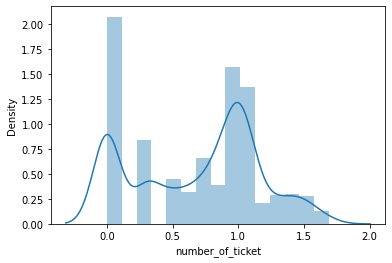

In [430]:
sns.distplot(np.log10(y_test))

In [431]:
params= {
            'min_child_weight': 10, 
            'eta': 0.004, 
            'colsample_bytree': 0.7, 
            'max_depth': 9,
            'subsample': 0.9, 'lambda': 5, 
            'nthread': 8, 
            'booster' : 'gbtree', 
            'eval_metric': 'rmse', 
            'objective': 'reg:linear',
            "gamma":0.5 ,
            "alpha":0.04,
            'silent': 1
}

In [435]:
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))


0.6179960871130025
0.09775319545577421


In [437]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [438]:
# Predicting 
y_pred = reg.predict(X_test)


# Find Mean Squared Error (MSE)
MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

# Find Root Mean Squared Error(RMSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)


#Find R-squared value
r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)

# Find Adjusted R-squared value
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 80.20406649710277
RMSE : 8.955672308492689
R2 : -0.06868886184483602
Adjusted R2 :  -0.09254352393958687
